# Estimation of Daily Fermentation Product Release - Analysis for British Reference Diet (Figure 2)

# Make sure to run Figure3 script first when running script

In [2]:
#load required functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import PercentFormatter
import scipy
import json
import os

capsize=6
#set colorscheme
colorav='k'
colorrefdiet='purple'
colorlistferm=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

labelenergybac="energy supply via bacteria (kcal)"
labelenergybacfrac="enery supply via bacteria (%)"

labelenergybacfracnounit="energy supply via bacteria"

results_for_figure2={}
import FPcalc #basic calculations of 

#dict to save major characteristics of British reference diet
#load file if already exists, otherwise start with empty dict
try:
    with open('data_analysisresults/BRD_characteristics.json', 'r') as fp:
        BRD = json.load(fp)
except:
    BRD={}

display(BRD)

#############################
#yield data to use as standard
dict_yielddata="data_analysisresults/average_excretion/selectedsamples_HMP_2019_ibdmdb_disease_healthy_age_adultsenior_NW_no_genus.json"
#selectedsamples_HMP_2019_ibdmdb_disease_healthy_age_All_NW_All_genus.json"
#############################



{'energy': 2275.0,
 'carbohydrates': 276.75,
 'sugars': 59.0,
 'proteins': 72.05000000000001,
 'fat': 105.5,
 'fiber': 19.9,
 'fiber_low': 14.599999999999998,
 'fiber_high': 25.2,
 'carbLI_standard': 35.670500000000004,
 'carbLI_higher': 44.6025,
 'carbLI_lower': 25.755000000000003,
 'carbLI_error': 9.423749999999998,
 'bacwetweight': 117.72413793103448,
 'fecalwetmass': 117.72413793103448,
 'fecaldrymass': 29.58620689655172,
 'fecaldrymassstd': 6.845624030794191,
 'fecealfractionbac': 0.546888888888889,
 'bacterialdrymass_feces': 16.180367816091955,
 'energybacteria_fromfeces': 101.71752675768855,
 'FP_fromfeces': 467.3659285620218,
 'FP_fromfeces_g': [8.035607499560594,
  2.7046488116402316,
  6.192333401520376,
  9.51608312429447,
  1.6695716933854843,
  4.741614607512687],
 'FP_fromfeces_gsum': 32.859859137913844,
 'energyfrac_fromfeces': 0.04471100077261035,
 'energybacteria_fromfeces_error': 23.53528953407475,
 'energyfrac_fromfeces_error': 0.01034518221278011,
 'FP_fromfeces_err

# Calculation fermentation products / energy contribution for British diet (via feces)


In [1]:
#start with calculating bacterial dry mass
print("av and std bacterial dry mass (std derived taking variation of fecal dry weight and fraction of bacteria into account)")


BRD["bacterialdrymass_feces"]=BRD["fecaldrymass"]*BRD["fecealfractionbac"]


#calculate energy fraction
BRD["energybacteria_fromfeces"],ferc,BRD["FP_fromfeces"],BRD["FP_fromfeces_g"],BRD["FP_fromfeces_gsum"],totalcarb,orderc,BRD["bacterialdrymass_feces"]=FPcalc.energycalc(BRD["bacterialdrymass_feces"],scenario='reference',calctype='from_feces',dict_yielddata=dict_yielddata)
BRD["energyfrac_fromfeces"]=BRD["energybacteria_fromfeces"]/BRD["energy"]

#totenergy,totfermlist,totfermlist_sum,totfermlist_gram,totfermlist_gram_sum,totfem_carb,order,bacdrymass #returns energy of fermentation products (in kcal) and 
print(BRD)

print(BRD["energybacteria_fromfeces"])
print(BRD["energy"])
print(BRD["energyfrac_fromfeces"])

#####
#calculate relative errors
#####

#relative error accumulates
#relerror=np.sqrt(np.power(BRD["fecaldrymassstd"]/BRD["fecaldrymass"],2)+np.power(BRD["fecealfractionbacstd"]/BRD["fecealfractionbac"],2)) #takes fecal mass variation and fraction bac dry mass into account
relerror=BRD["fecaldrymassstd"]/BRD["fecaldrymass"]

BRD["energybacteria_fromfeces_error"]=relerror*BRD["energybacteria_fromfeces"]
BRD["energyfrac_fromfeces_error"]=relerror*BRD["energyfrac_fromfeces"]
BRD["FP_fromfeces_error"]=relerror*BRD["FP_fromfeces"]
BRD["bacterialdrymass_feces_error"]=BRD["bacterialdrymass_feces"]*relerror

av and std bacterial dry mass (std derived taking variation of fecal dry weight and fraction of bacteria into account)


NameError: name 'BRD' is not defined

# Calculation energy contribution of bacteira for British ref diet (via carb content)

In [ ]:
#todo: check if energy calculations, why are the numbers so different for the different ways to estimate?

In [21]:
BRD["energy_fromcarbs_standard"],BRD["FPlist_fromcarbs_standard"],BRD["FP_fromcarbs_standard"],BRD["FP_fromcarbs_g_standard"],BRD["FP_fromcarbs_gsum_standard"],BRD["ferm_fromcarbs_cc_standard"],order,BRD["drymass_fromcarbs_standard"]=FPcalc.energycalc(BRD["carbLI_standard"],scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
BRD["energyfrac_fromcarbs_standard"]=BRD["energy_fromcarbs_standard"]/BRD["energy"]


BRD["energy_fromcarbs_lower"],BRD["FPlist_fromcarbs_lower"],BRD["FP_fromcarbs_lower"],BRD["FP_fromcarbs_g_lower"],BRD["FP_fromcarbs_gsum_lower"],BRD["ferm_fromcarbs_cc_lower"],order,BRD["drymass_fromcarbs_lower"]=FPcalc.energycalc(BRD["carbLI_lower"],scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
BRD["energy_fromcarbs_higher"],BRD["FPlist_fromcarbs_higher"],BRD["FP_fromcarbs_higher"],BRD["FP_fromcarbs_g_higher"],BRD["FP_fromcarbs_gsum_higher"],BRD["ferm_fromcarbs_cc_higher"],order,BRD["drymass_fromcarbs_higher"]=FPcalc.energycalc(BRD["carbLI_higher"],scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
BRD["energyfrac_fromcarbs_lower"]=BRD["energy_fromcarbs_lower"]/BRD["energy"]
BRD["energyfrac_fromcarbs_higher"]=BRD["energy_fromcarbs_higher"]/BRD["energy"]
#return totenergy,totfermlist,totfermlist_sum,totfermlist_gram,totfermlist_gram_sum,totfem_carb,order,bacdrymass #returns energy of fermentation products (in kcal) and amount of fermentation products (in mmol)

#errors from variation in carbon
relerror=BRD["carbLI_error"]/BRD["carbLI_standard"]
BRD["FP_fromcarbs_standard_error"]=relerror*BRD["FP_fromcarbs_standard"]
BRD["FP_fromcarbs_gsum_standard_error"]=relerror*BRD["FP_fromcarbs_gsum_standard"]
BRD["drymass_fromcarbs_standard_error"]=relerror*BRD["drymass_fromcarbs_standard"]
BRD["energy_fromcarbs_standard_error"]=relerror*BRD["energy_fromcarbs_standard"]
BRD["energyfrac_fromcarbs_standard_error"]=relerror*BRD["energyfrac_fromcarbs_standard"]


# Look into carbon balance (for via carbohydrate estimation)

## look at the numbers together with Markus. Double check: ASSUMED CARBON NUMBERS, DOUBLE CHECK CARBS PER CELL

In [22]:
for media in ["YCA"]:
    print("MEDIUM "+media)
    print("********used av. yield and excretion*******")


    #########################
    # DECIDE HERE WHICH AVERAGE YIELD AND EXCRETION VALUES TO USE
    #########################
    #old: av_"+media+"
    with open(os.path.join(dict_yielddata)) as f:
            yielddict = json.load(f)
    #print("carbon total secretion mmolC/g")
    #print(yielddict["total_secretion_carbon"])
    #print("carbon uptake mmolC/g")
    #print(yielddict["uptake_carbon"])


    print("********carbon input*******")
    print("carbon in LI in g")
    print(BRD["carbLI_standard"])
    print("carbon in LI in mmol")
    print(BRD["carbLI_standard"]/0.180 )
    print("carbon in LI in mmol carbon units")
    print(BRD["carbLI_standard"]*6/0.180)


    print("********carbon in excreted fermentation products *******")
    print("order FP list")
    print(order)
    print("used carbon per FP")
    cfactorlist=np.array([2,4,1,3,3,4])
    print(cfactorlist)

    print("daily secretion in mmol FP/day")
    print(np.array(BRD["FPlist_fromcarbs_standard"]))
    print("daily secretion in mmol C/day")
    print(np.array(BRD["FPlist_fromcarbs_standard"])*cfactorlist)
    print("total daily secretion mmol C/ day")
    print(np.sum(np.array(BRD["FPlist_fromcarbs_standard"])*cfactorlist))

    print("********carbon in bacteria*******")
    print("bacterial drymass in g")
    print(BRD["drymass_fromcarbs_standard"])
    print("bacterial drymass - carb atoms in g, assuming 0.5 dryweight is carb")
    print("DOUBLECHECK 0.5 factor correct?")
    print(BRD["drymass_fromcarbs_standard"]*0.5)
    print("bacterial drymass - g carb ")
    print(BRD["drymass_fromcarbs_standard"]*0.39)#/0.012) #assumes 12g/mol or 0.012g/mmol


MEDIUM YCA
********used av. yield and excretion*******
********carbon input*******
carbon in LI in g
35.670500000000004
carbon in LI in mmol
198.16944444444448
carbon in LI in mmol carbon units
1189.0166666666669
********carbon in excreted fermentation products *******
order FP list
['acetate', 'butyrate', 'formate', 'lactate', 'propionate', 'succinate']
used carbon per FP
[2 4 1 3 3 4]
daily secretion in mmol FP/day
[129.90345375  29.79992278 130.59989105 102.55558301  21.87960212
  38.9800676 ]
daily secretion in mmol C/day
[259.80690751 119.19969113 130.59989105 307.66674904  65.63880637
 155.92027039]
total daily secretion mmol C/ day
1038.8323154868044
********carbon in bacteria*******
bacterial drymass in g
15.707889889004568
bacterial drymass - carb atoms in g, assuming 0.5 dryweight is carb
DOUBLECHECK 0.5 factor correct?
7.853944944502284
bacterial drymass - g carb 
6.1260770567117815


# same carbon analysis but for different media

# Note: this assumes equal average of all strains characterized for this media

In [23]:

diffmedia=["YCA","epsilon","BHI","gamma"]
diffmedia_FP_viacarbs=[]
diffmedia_FP_viafeces=[]
for media in diffmedia:
    curengery,curFPlist,curFP,curFPg,curFPgsum,curFPcc,order,curdryweight=FPcalc.energycalc(BRD["carbLI_standard"],scenario='reference',calctype='from_carbs',dict_yielddata="data_analysisresults/average_excretion/av_"+media+".json")

    #also via feces
    curengeryVF,curFPlistVF,curFPVF,curFPgVF,curFPgsumVF,curFPccVF,orderVF,curdryweightVF=FPcalc.energycalc(BRD["bacterialdrymass_feces"],scenario='reference',calctype='from_feces',dict_yielddata="data_analysisresults/average_excretion/av_"+media+".json")
                                                                                          
    print("************************")
    print("************************")
    print("*********MEDIA: "+media)
    print("********used av. yield and excretion*******")

    with open(os.path.join("data_analysisresults/average_excretion/av_"+media+".json")) as f:
            yielddict = json.load(f)
    print("carbon total secretion mmolC/g")
    print(yielddict["total_secretion_carbon"])
    print("carbon uptake mmolC/g")
    print(yielddict["uptake_carbon"])

    print("total FP release")
    print(curFP)
    diffmedia_FP_viacarbs.append(curFP)
    print("total FP release via feces")
    print(curFPVF)
    diffmedia_FP_viafeces.append(curFPVF)
   
    print("********carbon input*******")
    #print("carbon in LI in g")
    #print(BRD["carbLI"])
    #print("carbon in LI in mmol")
    #print(BRD["carbLI"]/0.180 )
    print("carbon in LI in mmol carbon units")
    print(BRD["carbLI_standard"]*6/0.180)
    print("carbon in LI in g")
    print(BRD["carbLI_standard"])

    print("********carbon in excreted fermentation products *******")
    #print("order FP list")
    #print(order)
    #print("used carbon per FP")
    #cfactorlist=np.array([2,4,1,3,2,4])
    #print(cfactorlist)

    #print("daily secretion in mmol FP/day")
    #print(np.array(curFPlist))
    #print("daily secretion in mmol C/day")
    #print(np.array(curFPlist)*cfactorlist)
    print("total daily secretion mmol C/ day")
    print(np.sum(np.array(curFPlist)*cfactorlist))
    print("total daily secretion g C/day")
    print(np.sum(np.array(curFPlist)*cfactorlist)*12.01/1000.)

    print("********carbon in bacteria*******")
    #print("bacterial drymass in g")
    #print(curdryweight)
    #print("bacterial drymass - carb atoms in g, assuming 0.5 dryweight is carb")
    #print("DOUBLECHECK 0.5 factor correct?")
    #print(curdryweight*0.5)
    print("bacterial drymass - g carb")
    print(curdryweight*0.39)#/0.012) #assumes 12g/mol or 0.012g/mmol


************************
************************
*********MEDIA: YCA
********used av. yield and excretion*******
carbon total secretion mmolC/g
62.7521949917264
carbon uptake mmolC/g
84.6450046608256
total FP release
417.7575049985361
total FP release via feces
481.6014689894519
********carbon input*******
carbon in LI in mmol carbon units
1189.0166666666669
carbon in LI in g
35.670500000000004
********carbon in excreted fermentation products *******
total daily secretion mmol C/ day
913.1918696714423
total daily secretion g C/day
10.96743435475402
********carbon in bacteria*******
bacterial drymass - g carb
5.473806672905561
************************
************************
*********MEDIA: epsilon
********used av. yield and excretion*******
carbon total secretion mmolC/g
72.42044430725797
carbon uptake mmolC/g
76.3328459496272
total FP release
451.11936861675287
total FP release via feces
468.9916790061733
********carbon input*******
carbon in LI in mmol carbon units
1189.01666666666

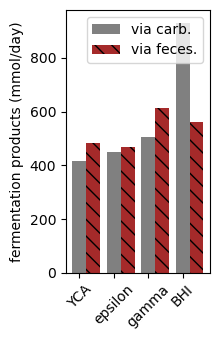

In [24]:

#plot FP release for different media
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

#
labelc=[]
poscount=0
for mC in [0,1,3,2]:
    poscount=poscount+1
    if poscount==1:
        label="via carb."
        label2="via feces."
    else:
        label=None
        label2=None
    axs[0].bar(poscount,diffmedia_FP_viacarbs[mC],width=0.4,color="gray",label=label)
    axs[0].bar(poscount+.4,diffmedia_FP_viafeces[mC],hatch="\\\\",width=0.4,color="brown",label=label2)
    labelc.append(diffmedia[mC])
axs[0].set_ylabel("fermentation products (mmol/day)")

 
axs[0].set_xticks([1,2,3,4])
axs[0].set_xticklabels(labelc,rotation=45)
#axs[0].set_xticks([1,2])
#axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

axs[0].legend()

fig.tight_layout()
fig.savefig("plot_output_figure2/FP_estimate_diffmedia.pdf")




# SIMPLE comparion plot

0.04471100077261035


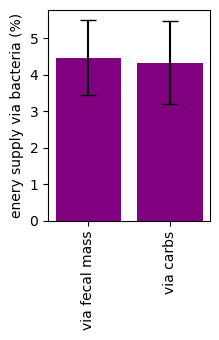

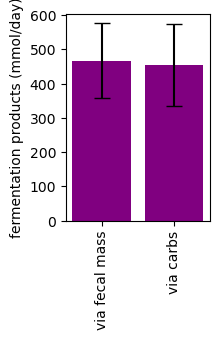

In [25]:
#compare different estimations (from fecal weight, and from carbs reaching LI
#
#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]


print(BRD["energyfrac_fromfeces"])
axs[0].bar([1,2],[BRD["energyfrac_fromfeces"]*100,BRD["energyfrac_fromcarbs_standard"]*100],yerr=[100*BRD["energyfrac_fromfeces_error"],100*BRD["energyfrac_fromcarbs_standard_error"]],color=[colorrefdiet,colorrefdiet],capsize=capsize)
#
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel(labelenergybacfrac)
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_carbLI.pdf")


#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

axs[0].bar([1,2],[BRD["FP_fromfeces"],BRD["FP_fromcarbs_standard"]],yerr=[BRD["FP_fromfeces_error"],BRD["FP_fromcarbs_standard_error"]],color=[colorrefdiet,colorrefdiet],capsize=capsize)
  
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel("fermentation products (mmol/day)")
axs[0].set_xticks([1,2])
axs[0].set_xticklabels(["via fecal mass","via carbs"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_carbLI_ferm2.pdf")








453.7185203183944
517.3548839547581
506.4919098565491
from carbs:
453.7185203183944
from prot:
63.63636363636368
from mucus:
52.77338953815473


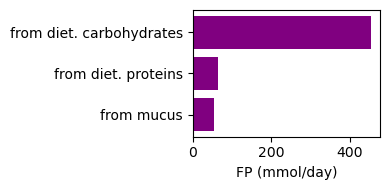

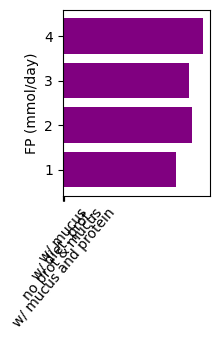

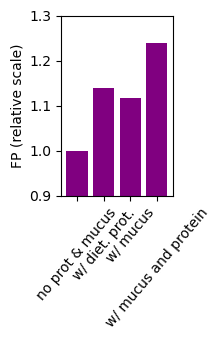

In [32]:
# add mucus and protein digestion

BRD["proteins_LI"]=7
#2. mucus reaching large intestine (from small intestine and sheddeing along LI)
BRD["mucus"]=4.4
#3. calculate protein and carhobhydrate content
BRD["mucus_protein"]=BRD["mucus"]*0.2
BRD["mucus_CH"]=BRD["mucus"]*0.8

energyfromc_x,fplistfromc_c,FPfromc_withprot,fpfromc_c_g,fpfromc_c_g_sum,cc,order,drymass=FPcalc.energycalc(BRD["carbLI_standard"],scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
FPfromc_withprot=FPfromc_withprot+1*BRD["proteins_LI"]/0.110 #convert into AA

energyfromc_x,fplistfromc_c,FPfromc_withmucus,fpfromc_c_g,fpfromc_c_g_sum,cc,order,drymass=FPcalc.energycalc(BRD["carbLI_standard"]+BRD["mucus_CH"],scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
FPfromc_withmucus=FPfromc_withmucus+1*BRD["mucus_protein"]/0.110

energyfromc_x,fplistfromc_c,FPfromc_withmucus_and_protein,fpfromc_c_g,fpfromc_c_g_sum,cc,order,drymass=FPcalc.energycalc(BRD["carbLI_standard"]+BRD["mucus_CH"],scenario='reference',calctype='from_carbs',dict_yielddata=dict_yielddata)
FPfromc_withmucus_and_protein=FPfromc_withmucus_and_protein+1*(BRD["proteins_LI"])/0.110

######################
#plot different estimations (w/o and w mucus and proteins etc)
###################

#horizontal bars, comparison from mucus and from 
fig, axs = plt.subplots(1,1, figsize=(4,2))
axs=[axs]

print(BRD["FP_fromcarbs_standard"])
print(FPfromc_withprot)
print(FPfromc_withmucus)

axs[0].barh([3,2,1],[BRD["FP_fromcarbs_standard"],FPfromc_withprot-BRD["FP_fromcarbs_standard"],FPfromc_withmucus-BRD["FP_fromcarbs_standard"]],color=3*[colorrefdiet],capsize=capsize)
  
#databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
print("from carbs:")
print(BRD["FP_fromcarbs_standard"])
print("from prot:")
print(FPfromc_withprot-BRD["FP_fromcarbs_standard"])
print("from mucus:")
print(FPfromc_withmucus-BRD["FP_fromcarbs_standard"])
axs[0].set_xlabel("FP (mmol/day)")
axs[0].set_yticks([3,2,1])
axs[0].set_yticklabels(["from diet. carbohydrates","from diet. proteins","from mucus"])#,rotation=50)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_carbLI_ferm_comp_mucus_and_proteins_2.pdf")


############
#other older plots
###########
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

axs[0].barh([1,2,3,4],[BRD["FP_fromcarbs_standard"],FPfromc_withprot,FPfromc_withmucus,FPfromc_withmucus_and_protein],color=4*[colorrefdiet],capsize=capsize)
  
#databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel("FP (mmol/day)")
axs[0].set_xticks([1,2,3,4])
axs[0].set_xticklabels(["no prot & mucus","w/ diet. prot.","w/ mucus","w/ mucus and protein"],rotation=50)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_carbLI_ferm_comp_mucus_and_proteins.pdf")



fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]

axs[0].bar([1,2,3,4],[BRD["FP_fromcarbs_standard"]/BRD["FP_fromcarbs_standard"],FPfromc_withprot/BRD["FP_fromcarbs_standard"],FPfromc_withmucus/BRD["FP_fromcarbs_standard"],FPfromc_withmucus_and_protein/BRD["FP_fromcarbs_standard"]],color=4*[colorrefdiet],capsize=capsize)
  
#databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])

axs[0].set_ylabel("FP (relative scale)")
axs[0].set_xticks([1,2,3,4])
axs[0].set_xticklabels(["no prot & mucus","w/ diet. prot.","w/ mucus","w/ mucus and protein"],rotation=50)
axs[0].set_ylim(0.9,1.3)

fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_carbLI_ferm_comp_mucus_and_proteins_foldchange.pdf")



## Fig. S2: Add figure how "carbs available for microbiota" changes with fiber digestion fraction and starch absorbance
--> Standard: 0.5 fiber digestion, 0.1 starch passage #Englyst. Fiber unclear, but we show that it does not matter much for British ref diet
e.g. panel: vary fiber digestion fraction on x-axis (show different lines for starch passage (0.05,0.1,0.15)
possible: add other panel showing how total FPs change with fiber digestion fraction



In [27]:
print(BRD)

{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI_standard': 35.670500000000004, 'carbLI_higher': 44.6025, 'carbLI_lower': 25.755000000000003, 'carbLI_error': 9.423749999999998, 'bacwetweight': 117.72413793103448, 'fecalwetmass': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'bacterialdrymass_feces': 16.180367816091955, 'energybacteria_fromfeces': np.float64(101.71752675768855), 'FP_fromfeces': np.float64(467.3659285620218), 'FP_fromfeces_g': [8.035607499560594, 2.7046488116402316, 6.192333401520376, 9.51608312429447, 1.6695716933854843, 4.741614607512687], 'FP_fromfeces_gsum': np.float64(32.859859137913844), 'energyfrac_fromfeces': np.float64(0.04471100077261035), 'energybacteria_fromfeces_error': np.float64(23.53528953407475), 'energyfrac_fromfeces_error': np.float64(0.

# Plots total amount of fermentation products reaching large intestine

For Fig. S
add as a side point how little of those fermentation products are recovered in feces


# main results British reference diet in one plot

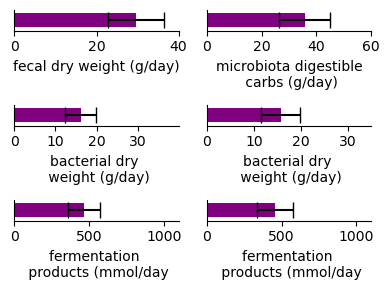

In [28]:
fig, axs = plt.subplots(3,2, figsize=(4,3))


####from carb calculation

#carbs
axs[0,1].barh(1,BRD["carbLI_standard"],height=0.7,xerr=BRD["carbLI_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[0,1].set_xlabel("microbiota digestible\n carbs (g/day)")
#bacterial dry mass
axs[1,1].barh(1,BRD["drymass_fromcarbs_standard"],height=0.7,xerr=BRD["drymass_fromcarbs_standard_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[1,1].set_xlabel("bacterial dry \n weight (g/day)")
#femrentation products
axs[2,1].barh(1,BRD["FP_fromcarbs_standard"],height=0.7,xerr=BRD["FP_fromcarbs_standard_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[2,1].set_xlabel("fermentation \n products (mmol/day")

#colors=[colorrefdiet]*2
#for patch, color in zip(bplot1['boxes'], colors):
#        patch.set_facecolor(color)
#axs[0].set_xlabel('bacterial dry mass (g/day)')
#axs[0].set_xlim(0,30)

####from feces calculation

#########
#feces
#########

axs[0,0].barh(1,BRD["fecaldrymass"],height=0.7,xerr=BRD["fecaldrymassstd"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[0,0].set_xlabel("fecal dry weight (g/day)")
#bacterial dry mass
axs[1,0].barh(1,BRD["bacterialdrymass_feces"],height=0.7,xerr=BRD["bacterialdrymass_feces_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[1,0].set_xlabel("bacterial dry \n weight (g/day)")
#femrentation products
axs[2,0].barh(1,BRD["FP_fromfeces"],height=0.7,xerr=BRD["FP_fromfeces_error"],color=[colorrefdiet,colorrefdiet],capsize=capsize)
axs[2,0].set_xlabel("fermentation \n products (mmol/day")

axs[0,0].set_xlim(0,40)
axs[0,1].set_xlim(0,60)
axs[1,0].set_xlim(0,40)
axs[1,1].set_xlim(0,35)
axs[2,0].set_xlim(0,1100)
axs[2,1].set_xlim(0,1100)


axs[0,0].set_yticks([])
axs[1,0].set_yticks([])
axs[2,0].set_yticks([])
axs[0,1].set_yticks([])
axs[1,1].set_yticks([])
axs[2,1].set_yticks([])

axs[1,0].set_xticks([0,10,20,30])
axs[1,1].set_xticks([0,10,20,30])

ym=0.5
ymax=1.5
axs[0,0].set_ylim(ym,ymax)
axs[1,0].set_ylim(ym,ymax)
axs[2,0].set_ylim(ym,ymax)
axs[0,1].set_ylim(ym,ymax)
axs[1,1].set_ylim(ym,ymax)
axs[2,1].set_ylim(ym,ymax)

axs[0,0].spines[['right', 'top']].set_visible(False)
axs[1,0].spines[['right', 'top']].set_visible(False)
axs[2,0].spines[['right', 'top']].set_visible(False)
axs[0,1].spines[['right', 'top']].set_visible(False)
axs[1,1].spines[['right', 'top']].set_visible(False)
axs[2,1].spines[['right', 'top']].set_visible(False)


fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_mainnumbers.pdf")



# Fermentation products in feces

{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI_standard': 35.670500000000004, 'carbLI_higher': 44.6025, 'carbLI_lower': 25.755000000000003, 'carbLI_error': 9.423749999999998, 'bacwetweight': 117.72413793103448, 'fecalwetmass': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'bacterialdrymass_feces': 16.180367816091955, 'energybacteria_fromfeces': np.float64(101.71752675768855), 'FP_fromfeces': np.float64(467.3659285620218), 'FP_fromfeces_g': [8.035607499560594, 2.7046488116402316, 6.192333401520376, 9.51608312429447, 1.6695716933854843, 4.741614607512687], 'FP_fromfeces_gsum': np.float64(32.859859137913844), 'energyfrac_fromfeces': np.float64(0.04471100077261035), 'energybacteria_fromfeces_error': np.float64(23.53528953407475), 'energyfrac_fromfeces_error': np.float64(0.

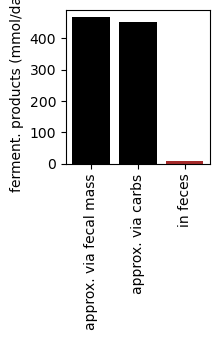

In [29]:
#how much mmol of fermentation products in feces
#typical value is 80mmol/l (or 76.8 mmol/l as reported in the following)
#https://pubmed.ncbi.nlm.nih.gov/6740214/
print(BRD)

BRD["FP_infeces"]=BRD["fecalwetmass"]*76.8/1000.
ferminfeces_upper=BRD["fecalwetmass"]*190/1000.
ferminfeces_lower=BRD["fecalwetmass"]*30/1000.
BRD["FP_infeces_error"]=(ferminfeces_upper-ferminfeces_lower)/2.
ferminfeces_g=BRD["FP_infeces"]*0.08 #assume roughly average


with open(os.path.join("data_analysisresults/average_excretion/av_YCA.json")) as f:
        yielddict2 = json.load(f)
print(yielddict2.items())

### read in json file with secretion data
fpinfeces_list=[]
sum_fp=0
sum_c=0
subc=-1
ccount=[2,4,1,3,4,2]
for sub in ["acetate","butyrate","formate","lactate","succinate","propionate"]:
    subc=subc+1
    fpinfeces_list.append(yielddict2[sub]*BRD["FP_infeces"]/yielddict["total_secretion"])
    sum_fp=sum_fp+fpinfeces_list[-1]
    sum_c=sum_c+fpinfeces_list[-1]*ccount[subc]
print("total secretion feces mmol/day:")
print(BRD["FP_infeces"])
print("different fp products (ace,but,for,lac,suc,prop, mmol/day):")
print(fpinfeces_list)
print(sum_fp)
print("C in different products mmol/day")
print(sum_c)



###calculate carbon content of FP in feces
###assume same consumption as secreted by bacteria

#plot energy fraction for both types of measurements
fig, axs = plt.subplots(1,1, figsize=(2.3,3.5))
axs=[axs]
axs[0].bar([1,2,3],[BRD["FP_fromfeces"],BRD["FP_fromcarbs_standard"],BRD["FP_infeces"]],color=['k','k','brown'])
        
#    databox,labels=["bacteria"],vert=True,showfliers=True, widths=[0.7]*1,patch_artist=True,)#,"Mice (autoclaved lab coy)"])
axs[0].set_ylabel('ferment. products (mmol/day)')
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(["approx. via fecal mass","approx. via carbs","in feces"],rotation=90)
#axs[0].set_ylim(0,280)

fig.tight_layout()
fig.savefig("plot_output_figure2/BRITISH_ferm_includeinfeces.pdf")


# Consideration of ATP

In [30]:


####
#look into pathways, how many ATP are obtained per fermentation product. This varies with the metabolic pathways involves. And in principle it also depends on the type of sugar involved. But things simplify as glucose and other substrates are mostly utilized via glycolysis.
#considering glycolysis, the first step is to go from 1 glucose 
####
#how much ATP is released per fermentation pathway
ATPgain=[2,2,0,2,2]#ATP gain for the cell per excreted acetate, butyrate, lactate, propinonate, succinate
#most of the pathways give 2ATP per secretion of a fermentation product, but lactate does not give any atp (but helps with the redox balance)

#####
#use excretion numbers to estimate ATP
#####

#excretionBg fermentation products released (in mmol/g)
#ATP release per fermentation
ATPyieldc=np.array([np.sum(ATPgain*excretionBg),np.sum(ATPgain*excretionEg)])#in mmol ATP/g
#convert to g/mol ATP
ATPyieldc=1000./ATPyieldc
print("ATP yield estimated via excretion of fermentation products (g/mol ATP)")
print(ATPyieldc)

#B.theta and E.rectale yield in OD/mM
yield_glucose=np.array([0.148, 0.094])
yield_glucose_std=np.array([0.046,0.009])
#conversion in g/mmol
conversitionOD=np.array([0.507,0.5,0.494,0.522,0.516,0.513]).mean() #in g/(l*OD) #this is based on Basan et al 2015 (inflating cell size), for our spec
yield_glucose=1000*yield_glucose*conversitionOD #in g/mol=OD l/mol *g/l/OD=g/mol; (1000 to coonvert mmol to mol)
yield_glucose_std=1000*yield_glucose_std*conversitionOD
print("measred yields in g/mol glucose for B. theta and E. rectale")
print(yield_glucose) #yield in g dryweight /mol glucose

#remove the minimal amount which is needed for biomass accumulation
#remove fractioon of glucose needed to make biomass (estimated via carbon requirement)
#start with fraction of carbon in dry mass 0.47 g C/g cells -> 0.47/12=0.039 mol carb /g cells (12g/mol carb) -> 0.039/6=0.0065 mol glu/g cells (6 c per glucose) --> 25.6 g cells/mol glu
print('yield corrected for biomass')
yield_glucose_biomasscorrected=yield_glucose-25.6
print(yield_glucose_biomasscorrected)
print("Calculate ATP yield (g/mol ATP)")
#print(yield_glucose_biomasscorrected/ATPperGlu)

####
#compare with theoretical estimation of yield
####
#Stouthamer 1973 calculate as max yield: 28.5 g/mol ATP or 35 mmol ATP/g 
#other authors calculate lower yield. E.g. 14.7 g/mol ATP or 68 mmol ATP/g. Feist et al. 2007
#check also Niedhardt et al. 1990
#some difference in treating the metabolic costs of NAD(H), NADP(H), and FAD(H2).

print('theoretical yield estimated for E. coli in g/mol ATP')
print("between 15 and 28 depending on authors")

####
#compare with experimental values from E. coli
####
#see also very useful notes from Ron Milo's group https://openwetware.org/wiki/Ecoli_ATP_requirement
#experimenta yield
print('experimental yield estimated for E. coli in g/mol ATP')
print(10)
#experimentally estimated for E. coli as YATP_max (no maintaneance energy) for growth in anaerobic conditions
#approx 10.3 grams of cells per mole of ATP (Hempfling and Mainzer 1975). Other reported values vary a bit, e.g. ~8g/mol ATP

#####
#use difference in ethnalpies
#####

#start with glucose: yield_glucose in g cells per mol glucose
H_glu=0.6787763*1000# kcal/mol

energy_consumed=H_glu/yield_glucose_biomasscorrected
print("energy consumbed by different strains")
print(energy_consumed)
#excretionBg fermentation products released (in mmol/g)
#enthalpie in kcal per mmol
energy_released=np.sum(excretionBg*H),np.sum(excretionEg*H) #energy released in kcal per g
print("energy released by different strains")
print(energy_released)
print("net energy needed for growth")

NameError: name 'excretionBg' is not defined

# Save numbers to dict

In [31]:
print(BRD)
with open('data_analysisresults/BRD_characteristics.json', 'w') as fp:
    json.dump(BRD, fp)

{'energy': 2275.0, 'carbohydrates': 276.75, 'sugars': 59.0, 'proteins': 72.05000000000001, 'fat': 105.5, 'fiber': 19.9, 'fiber_low': 14.599999999999998, 'fiber_high': 25.2, 'carbLI_standard': 35.670500000000004, 'carbLI_higher': 44.6025, 'carbLI_lower': 25.755000000000003, 'carbLI_error': 9.423749999999998, 'bacwetweight': 117.72413793103448, 'fecalwetmass': 117.72413793103448, 'fecaldrymass': 29.58620689655172, 'fecaldrymassstd': 6.845624030794191, 'fecealfractionbac': 0.546888888888889, 'bacterialdrymass_feces': 16.180367816091955, 'energybacteria_fromfeces': np.float64(101.71752675768855), 'FP_fromfeces': np.float64(467.3659285620218), 'FP_fromfeces_g': [8.035607499560594, 2.7046488116402316, 6.192333401520376, 9.51608312429447, 1.6695716933854843, 4.741614607512687], 'FP_fromfeces_gsum': np.float64(32.859859137913844), 'energyfrac_fromfeces': np.float64(0.04471100077261035), 'energybacteria_fromfeces_error': np.float64(23.53528953407475), 'energyfrac_fromfeces_error': np.float64(0.